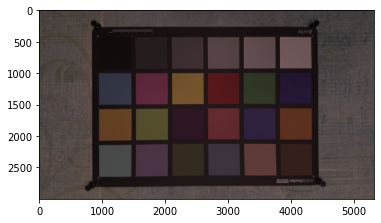

In [1]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
img=Image .open('data/SIDD/SIDD_Small_sRGB_Only/Data/0001_001_S6_00100_00060_3200_L/GT_SRGB_010.PNG')
img=np.array(img)
plt.imshow(img)

In [2]:
print(img.shape)
print(img)

(3000, 5328, 3)
[[[56 63 77]
  [41 57 49]
  [ 7 46  0]
  ...
  [38 38 12]
  [35 40  0]
  [35 33  0]]

 [[72 69 70]
  [50 59 56]
  [16 42 12]
  ...
  [42 45 23]
  [37 40 12]
  [36 39  0]]

 [[54 51 61]
  [53 56 51]
  [59 59 41]
  ...
  [57 54 44]
  [57 54 42]
  [53 51 37]]

 ...

 [[63 62 57]
  [65 64 59]
  [73 69 66]
  ...
  [95 83 77]
  [86 80 73]
  [81 78 70]]

 [[64 66 57]
  [65 65 59]
  [70 67 65]
  ...
  [91 83 76]
  [82 76 72]
  [73 66 63]]

 [[63 65 56]
  [64 66 58]
  [69 66 63]
  ...
  [90 81 75]
  [80 70 71]
  [58 56 57]]]


In [19]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torchvision
import torch
class TestDataSet(Dataset):
    def __init__(self) -> None:
        super(TestDataSet,self).__init__()
    def __getitem__(self, index):
        return torchvision.io.read_image('data/SIDD/128x128/clean/GT_1.png',mode=torchvision.io.ImageReadMode.RGB_ALPHA).to(device='cuda')
    def __len__(self):
        return 1
datasource=TestDataSet()
datas=DataLoader(datasource,batch_size=1)

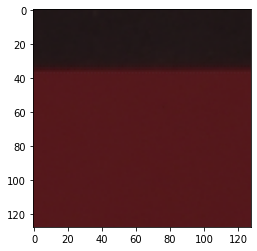

In [24]:
from torchvision.transforms.functional import to_pil_image
import torch.utils.tensorboard
from torch.utils.tensorboard.writer import SummaryWriter
writer=SummaryWriter()
for img in datas:
    img=img.select(0,0).to(dtype=torch.uint8)
    writer.add_image('test',img)
    plt.imshow(to_pil_image(img))